In [1]:
import pandas as pdp
import numpy as npp
import seaborn as snss
import matplotlib.pyplot as plt

In [2]:
location = r'F:\EducationalData\Simplilearn\ML\Files\datasets\survey.csv'
data = pdp.read_csv(location)
print('value count \n')
print(data.count())
print('\n is null \n')
print(data.isnull().sum())
print('\n shape \n')
print(data.shape)
print('\n duplicates \n')
print(data[data.duplicated()].count())
print('\n data types of the columns')
print(data.dtypes, '\n')
data.tail()

value count 

salary        46
experience    46
education     46
management    46
dtype: int64

 is null 

salary        0
experience    0
education     0
management    0
dtype: int64

 shape 

(46, 4)

 duplicates 

salary        0
experience    0
education     0
management    0
dtype: int64

 data types of the columns
salary         int64
experience     int64
education     object
management    object
dtype: object 



,salary,experience,education,management
41,27837,16,Master,Y
42,18838,16,Master,N
43,17483,16,Bachelor,N
44,19207,17,Master,N
45,19346,20,Bachelor,N


## 1) Calculate the following of variable of salary
    1) Mean
    2) Max
    3) Min
    4) SD
    5) Count
    6) Median
    7) Std
    8) Var

In [3]:
data['salary'].agg(['mean','max','min','count','median','std','var'])

mean      1.727020e+04
max       2.783700e+04
min       1.053500e+04
count     4.600000e+01
median    1.643600e+04
std       4.716632e+03
var       2.224661e+07
Name: salary, dtype: float64

In [4]:
obj_data = data.select_dtypes(include= ['object']).copy()
data_1   = data.copy()

In [5]:
for x in obj_data:
    print('\n' ,x, '\n')
    print(obj_data[x].unique())
    print(obj_data[x].value_counts())


 education 

['Bachelor' 'Ph.D' 'Master']
Master      19
Bachelor    14
Ph.D        13
Name: education, dtype: int64

 management 

['Y' 'N']
N    26
Y    20
Name: management, dtype: int64


In [6]:
nums = {"education":{"Master": 0, 
                     "Bachelor": 1,
                     "Ph.D":2
                    },
    
                "management":{"Y": 1, 
                              "N": 0
                              }
       } 

In [7]:
obj_data.replace(nums, inplace=True)
print(obj_data.dtypes)

for x in obj_data:
    data[x]=obj_data[x]
data.head()

education     int64
management    int64
dtype: object


,salary,experience,education,management
0,13876,1,1,1
1,11608,1,2,0
2,18701,1,2,1
3,11283,1,0,0
4,11767,1,2,0


In [8]:
data_2 = data_1.copy()
data_2['education'] = data['education']

## 2) Scatter plots for given data variable

## excluding Management variable

<IPython.core.display.Javascript object>

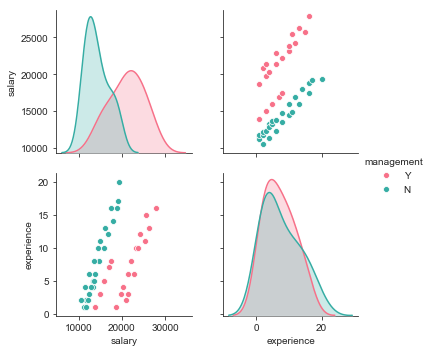

In [9]:
sns.set_style("ticks")
snss.pairplot(data_1,hue='management',diag_kind="kde",kind="scatter",palette="husl")
plt.show()

## Conclusion

1. Relationship bitween salary and experinace is leanier
2. Management role is linealy seprable based on the salary and experiance variables 

## 3) Generate Box plots of given variable 

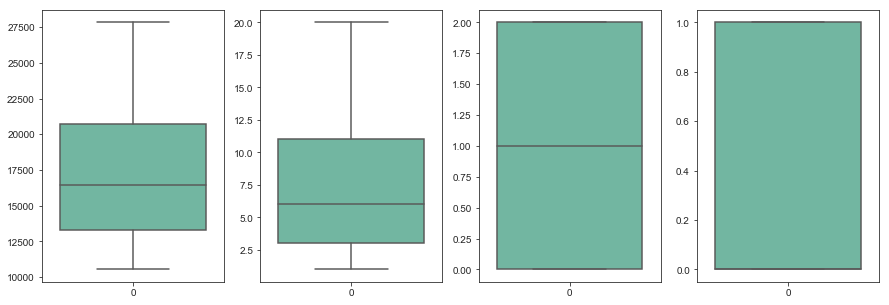

In [10]:
i=0
fig, axes = plt.subplots(ncols=4, figsize = (15,5))
for x in data:
    snss.boxplot(data=data[x], palette = 'Set2', ax= axes[i])
    i= i+1

## Conclusion

1. data dont contain the outliers

## Density plot with one figure containing multiple axes

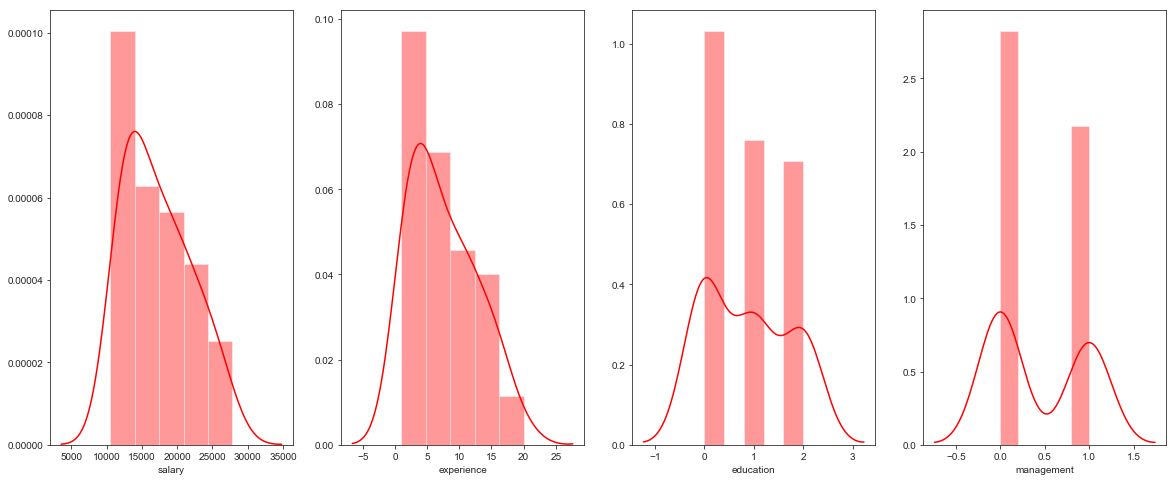

In [11]:
i=0
fig, axes = plt.subplots(ncols=4, figsize = (20,8))
for x in data:
    snss.distplot(data[x], bins=5, color = 'red',ax=axes[i])
    i= i+1

## Conclusion

It tells the distribusion of data.
1. Salary is positily skewed
2. Experience is positily skewed
3. education is multimodal or trimodal
4. Manahment is bimodal

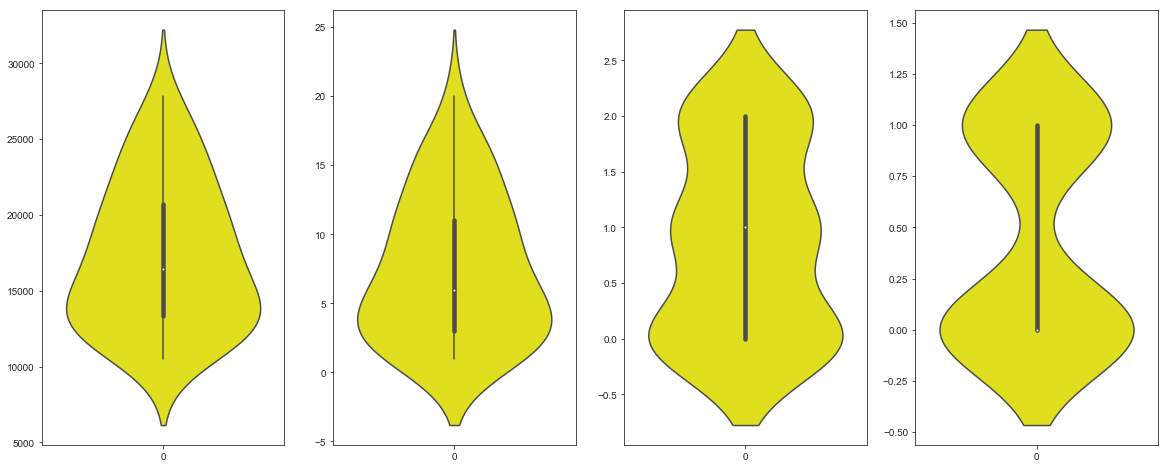

In [12]:
i=0
fig, axes = plt.subplots(ncols=4, figsize = (20,8))
for x in data:
    snss.violinplot(data = data[x],color = 'yellow', ax=axes[i]) 
    i= i+1

## Conclusion

Violin plot tells how data is distributed



## 4) Generate axis plot for Management (SVG: Scalable Vector Graphics)
## Density vs salary for Masters
## Density vs salary for Ph.D
## Density vs salary for Manager Employee

I have not worked with pygal as of now 